## Results of Cartpole Simulations

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
results_dir = 'results'
sub_dir = 'CartPole-BT-dL-v0'
os.listdir(results_dir)

['.DS_Store']

In [36]:
icloud_doc_dir = "/Users/billtubbs/Library/Mobile Documents/com~apple~CloudDocs/Documents"
os.listdir(os.path.join(icloud_doc_dir, 'MyDocuments', 'Projects', 'Testing RL', 
                        'Experiments'))

['.DS_Store', 'Bayesian optimization', 'Param searches']

## Functions used in this notebook

In [85]:
def cum_rewards_plot(ax, results, x_label, y_label, title='Parameter Search Results'):

    param_min_max = {
        param: (values.min(), values.max()) 
        for param, values in param_values.items()
    }
    
    best_rewards = results['Cum Reward'] > -0.01
    high_rewards = results['Cum Reward'] > -0.5
    low_rewards = results['Cum Reward'] < -10000

    x = results.loc[high_rewards, x_label]
    y = results.loc[high_rewards, y_label]
    ax.scatter(x, y, marker='o', label='R > -1')

    x = results.loc[best_rewards, x_label]
    y = results.loc[best_rewards, y_label]
    ax.scatter(x, y, marker='.', label='R > -0.01')

    #x = results.loc[low_rewards, x_label]
    #y = results.loc[low_rewards, y_label]
    #ax.scatter(x, y, marker='+', label='R < -10,000')

    ax.set_title(title)
    ax.set_xlim(param_min_max[x_label][0], param_min_max[x_label][1])
    ax.set_ylim(param_min_max[y_label][0], param_min_max[y_label][1])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid()

In [92]:
results_dir = os.path.join(icloud_doc_dir, 'MyDocuments', 'Projects', 'Testing RL', 
                        'Experiments')
os.listdir(results_dir)

['.DS_Store', 'Bayesian optimization', 'Param searches']

## Parameter Search Results

In [86]:
results_dir = os.path.join(icloud_doc_dir, 'MyDocuments', 'Projects', 'Testing RL', 
                        'Experiments', 'Param searches')
os.listdir(results_dir)

['.DS_Store',
 'CartPole-BT-dL-v0',
 'CartPole-BT-v0',
 'CartPole-BT-vH-v0',
 'CartPole-BT-vL-v0']

In [94]:
sub_dir = 'CartPole-BT-vL-v0'
os.listdir(os.path.join(results_dir, sub_dir))

['.DS_Store', 'bo-2019-10-26.csv']

### Grid Search

In [87]:
filename = 'param_sweep_results-2019-10-11.csv'

filepath = os.path.join(results_dir, sub_dir, filename)
results = pd.read_csv(filepath, header=None)
results.columns = ['x0', 'x1', 'x2', 'x3', 'Cum Reward']
len(results)

194481

In [88]:
param_values = {label: results[label].unique() for label in ['x0', 'x1', 'x2', 'x3']}
param_values

{'x0': array([-500., -450., -400., -350., -300., -250., -200., -150., -100.,
         -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,
         400.,  450.,  500.]),
 'x1': array([-500., -450., -400., -350., -300., -250., -200., -150., -100.,
         -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,
         400.,  450.,  500.]),
 'x2': array([-2500., -2250., -2000., -1750., -1500., -1250., -1000.,  -750.,
         -500.,  -250.,     0.,   250.,   500.,   750.,  1000.,  1250.,
         1500.,  1750.,  2000.,  2250.,  2500.]),
 'x3': array([-2500., -2250., -2000., -1750., -1500., -1250., -1000.,  -750.,
         -500.,  -250.,     0.,   250.,   500.,   750.,  1000.,  1250.,
         1500.,  1750.,  2000.,  2250.,  2500.])}

In [89]:
param_min_max = {
    param: (values.min(), values.max()) for param, values in param_values.items()
}
param_min_max

{'x0': (-500.0, 500.0),
 'x1': (-500.0, 500.0),
 'x2': (-2500.0, 2500.0),
 'x3': (-2500.0, 2500.0)}

In [90]:
results['Cum Reward'].min(), results['Cum Reward'].max()

(-2242385.6744955927, -0.0002442803787247315)

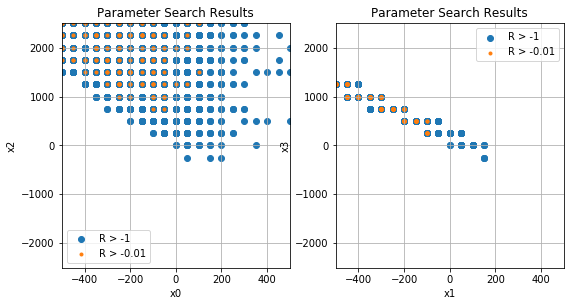

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4.5))

cum_rewards_plot(axes[0], results, x_label='x0', y_label='x2')
cum_rewards_plot(axes[1], results, x_label='x1', y_label='x3')

plt.savefig('param-search-results.png')
plt.show()

## Bayesian Optimization

In [95]:
results_dir = os.path.join(icloud_doc_dir, 'MyDocuments', 'Projects', 'Testing RL', 
                        'Experiments', 'Bayesian optimization')
os.listdir(results_dir)

['.DS_Store', 'CartPole-BT-vL-v0']

In [96]:
sub_dir = 'CartPole-BT-vL-v0'
os.listdir(os.path.join(results_dir, sub_dir))

['.DS_Store', 'bo-2019-10-26.csv']

In [106]:
filename = 'bo-2019-10-26.csv'
sub_dir = 'CartPole-BT-vL-v0'
filepath = os.path.join(results_dir, sub_dir, filename)
results = pd.read_csv(filepath, header=None)
results.columns = ['Episodes', 'x', 'x_dot', 'theta', 'theta_dot', 'Reward']
len(results)

111

In [107]:
results.head()

,Episodes,x,x_dot,theta,theta_dot,Reward
0,50,-80.805486,185.219500,-516.162629,194.083670,-11232.176803
1,75,-50.866779,244.044140,-542.825030,278.447187,-9541.786104
2,100,-45.419108,272.352793,-536.964409,248.190764,-7075.328202
3,125,-34.636755,276.998274,-527.699843,247.639437,-5839.947774
4,150,-34.636755,276.998274,-527.699843,247.639437,-5839.947774


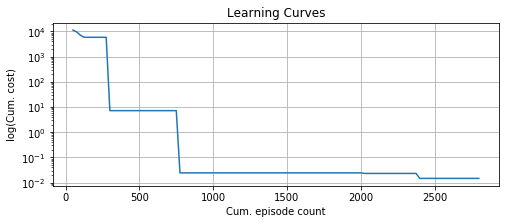

In [115]:
plt.figure(figsize=(8, 3))
plt.plot(results['Episodes'], -results['Reward'], label='BO')
plt.yscale('log')
plt.xlabel('Cum. episode count')
plt.ylabel('log(Cum. cost)')
plt.title('Learning Curves')
plt.grid()
plt.show()